# Rubik's Cubes: An Analysis of Scrambles
Jaraad Kamal

## Background and Definitions
The Rubik's Cube was a puzzle game created by Ernő Rubik in 1974. Throughout the years it has gained immense popularity as more and more people learn to solve it and compete. 
I have been solving Rubik's Cubes for over half my life. I am by no means a competition level solver but I have always been interested in the highest levels of speed cubing.
> **Speed Cubing**
> <br>
> Competitively solving Rubik's Cubes as fast as possible.

In this tutorial we will discuss the scrambles of a **3x3 Rubik's Cube**. 
### Goal
For this tutorial we will be finding out if specific competitions that are harder for 3x3 rubiks cubes (i.e. produce higher average times than other).


## Getting the Data
For this project I will be using the database created by the **World Cube Association** (WCA), they host the largest and most updated database for competitions throughout the world. I will be using the data up to April 14<sup>th</sup>, 2022.
> **Links**
><br>
> WCA Homepage: https://www.worldcubeassociation.org/
><br>
> WCA Database Download: https://www.worldcubeassociation.org/results/misc/export.html

For this tutorial download the **tsv zip file** and extract the contents into a subfolder of your choice.

## Getting to Know the Data
The files created by the WCA is *big* Trying to just get a text editor to open them up is a bad idea. Before blindly coding it is important that you get comfortable with the way it is formatted. The database comes with a **README** file that gives an overview. 
<br><br>
Briefly, the tsv files are a collection of tables each with their own information. According to the **README** the database itself consists of the following tables:

| Table                                   | Contents                                           |
| --------------------------------------- | -------------------------------------------------- |
| Persons                                 | WCA competitors                                    |
| Competitions                            | WCA competitions                                   |
| Events                                  | WCA events (3x3x3 Cube, Megaminx, etc)             |
| Results                                 | WCA results per competition+event+round+person     |
| RanksSingle                             | Best single result per competitor+event and ranks  |
| RanksAverage                            | Best average result per competitor+event and ranks |
| RoundTypes                              | The round types (first, final, etc)                |
| Formats                                 | The round formats (best of 3, average of 5, etc)   |
| Countries                               | Countries                                          |
| Continents                              | Continents                                         |
| Scrambles                               | Scrambles                                          |
| championships                           | Championship competitions                          |
| eligible_country_iso2s_for_championship | See explanation below                              |


>**Note**
><br>
>For this tutorial we are examining if there are specific scrambles that are harder than others. 
>To do this we will only look at the **Scrambles** and the **Results** tables. 
>The remaining files will not be any use for us.

## The Code
For this tutorial I will be working in **Python 3**.
<br>
First lets import some libraries that will be usefull later on.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the Data
The data we need are stored in two files called **WCA_export_Results.tsv** and **WCA_export_Competitions.tsv**.
To work with this data we will load their information into two variables called `results_frame` and `scrambles_frame`.

In [2]:
results_frame = pd.read_csv("extracted_tsv/WCA_export_Results.tsv", sep = '\t')
competitions_frame = pd.read_csv("extracted_tsv/WCA_export_Competitions.tsv", sep = '\t')

Now we can take a small look at the data.

In [3]:
display(results_frame.head())
display(competitions_frame.head())
print("size of results is: ", len(results_frame))
print("size of competitons is: ", len(competitions_frame))

,competitionId,eventId,roundTypeId,pos,best,average,personName,personId,personCountryId,formatId,value1,value2,value3,value4,value5,regionalSingleRecord,regionalAverageRecord
0,LyonOpen2007,333,1,15,1968,2128,Etienne Amany,2007AMAN01,Cote d_Ivoire,a,1968,2203,2138,2139,2108,AfR,AfR
1,LyonOpen2007,333,1,16,1731,2140,Thomas Rouault,2004ROUA01,France,a,2222,2153,1731,2334,2046,NaN,NaN
2,LyonOpen2007,333,1,17,2305,2637,Antoine Simon-Chautemps,2005SIMO01,France,a,3430,2581,2540,2789,2305,NaN,NaN
3,LyonOpen2007,333,1,18,2452,2637,Irène Mallordy,2007MALL01,France,a,2715,2452,2868,2632,2564,NaN,NaN
4,LyonOpen2007,333,1,19,2677,2906,Marlène Desmaisons,2007DESM01,France,a,2921,3184,2891,2677,2907,NaN,NaN


,id,name,cityName,countryId,information,year,month,day,endMonth,endDay,...,eventSpecs,wcaDelegate,organiser,venue,venueAddress,venueDetails,external_website,cellName,latitude,longitude
0,100Merito2018,100º Mérito 2018,"Santarém, Pará",Brazil,Qualquer pessoa que resolva o Cubo Mágico em m...,2018,4,14,4,14,...,222 333 333bf 333ft 444 pyram skewb,[{Rafael de Andrade Cinoto}{mailto:rcinoto@wor...,[{Davi de Andrade Iácono}{mailto:cuber.paragom...,[Mérito Pré-Vestibulares](https://www.facebook...,"Avenida Mendonça Furtado, 1120 - CEP: 68040050",Próximo ao Colégio São Francisco,NaN,100º Mérito 2018,-2422498,-54712597
1,10doRioGrandedoNorte2018,10º do Rio Grande do Norte 2018,"João Câmara, Rio Grande do Norte",Brazil,"O valor das inscrições será de R$ 6,00 a serem...",2018,12,15,12,16,...,222 333 333fm 333oh 444 555 clock minx pyram s...,[{Pablo Eduardo Nikolais Teixeira Bonifácio da...,[{Associacao Norte Rio Grandense Cubo Mágico}{...,Escola Estadual em Tempo Integral Francisco de...,"R. João Teixeira, João Câmara - RN, 59550-000",A competição acontecerá no Pátio da escola,NaN,10º do Rio Grande do Norte 2018,-5536382,-35816234
2,12SidesofSilesia2018,12 Sides of Silesia 2018,Dąbrowa Górnicza,Poland,Limit of competitors: 50. Entry fee: 20 PLN,2018,3,3,3,3,...,333bf 666 777 minx sq1,[{Piotr Trząski}{mailto:ptrzaski@worldcubeasso...,[{Bartłomiej Owczarek}{mailto:owczarcuber@gmai...,[Centrum Aktywności Obywatelskiej] (http://ngo...,"Henryka Sienkiewicza 6A, 41-300 Dąbrowa Górnicza",NaN,NaN,12 Sides of Silesia 2018,50324482,19179497
3,150thCubeMeetinginBrest2017,150th Cube Meeting in Brest 2017,Brest,Belarus,"Registration will be closed on July, 16 or whe...",2017,7,22,7,23,...,222 333 333bf 333fm 333ft 333mbf 333oh 444 444...,[{Ilya Tsiareshka}{mailto:itsiareshka@worldcub...,[{Ilya Tsiareshka}{mailto:itsiareshka@worldcub...,[Brest Regional Centre of Olympic Reserve for ...,"street Oktyabrskoy revolyutsii, 2",On the second floor in conference hall,http://vk.com/cmb150,150 Cube Meeting in Brest 2017,52082331,23741572
4,1AVG2013,1 AVG competition 2013,Delft,Netherlands,"This, very serious (not an April Fools joke), ...",2013,4,1,4,1,...,222 333 333bf 333oh 444 555 666 777 clock minx...,[{Ron van Bruchem}{mailto:rbruchem@worldcubeas...,[{Arnaud van Galen}{mailto:arnaudvangalen@hotm...,[Scouting Paulus](http://scoutingpaulus.nl),"Baden Powellpad 2, Delft",NaN,http://waschbaerli.com/wca/1avg,1 AVG 2013,52010740,4356539


size of results is:  2789385
size of competitons is:  7836


#### Observations
As you can see there is **A LOT** of data, and a lot of the data is information that we do not need and must clean up.

#### Cleaning up the `competitions_frame`
The following will display the column names:

In [4]:
for col in competitions_frame.columns:
    print(col)

id
name
cityName
countryId
information
year
month
day
endMonth
endDay
cancelled
eventSpecs
wcaDelegate
organiser
venue
venueAddress
venueDetails
external_website
cellName
latitude
longitude


Now lets clean up the competitions table by droppping all the unnecessay columns (such as `venue`, `organiser`, etc.) and combine the start date columns into one column

In [5]:
necessary_cols = set(['id', 'name', 'countryId', 'cancelled', 'year', 'month', 'day'])
# getting the unnecessary columns
unncessary_cols = set(competitions_frame.columns.tolist()) - necessary_cols

# dropping the unncessary columns
competitions_frame.drop(unncessary_cols, axis = 1, inplace = True)

# combining the year-month-day columns to one datetime column
competitions_frame['startDate'] = pd.to_datetime(competitions_frame[['year', 'month', 'day']])

# keeping the year because it can be useful when doing analysis
competitions_frame.drop(['month','day'], axis = 1, inplace = True)

# veiwing
display(competitions_frame.head())

,id,name,countryId,year,cancelled,startDate
0,100Merito2018,100º Mérito 2018,Brazil,2018,0,2018-04-14
1,10doRioGrandedoNorte2018,10º do Rio Grande do Norte 2018,Brazil,2018,0,2018-12-15
2,12SidesofSilesia2018,12 Sides of Silesia 2018,Poland,2018,0,2018-03-03
3,150thCubeMeetinginBrest2017,150th Cube Meeting in Brest 2017,Belarus,2017,0,2017-07-22
4,1AVG2013,1 AVG competition 2013,Netherlands,2013,0,2013-04-01


One last step is cleaning up the name column. Currently it has both the name of the competition and the year all in one cell. I want to drop the information about the year so we have a consistent name.

In [6]:
# the last 5 characters of every name seem to be the year information so slicing the string should be fine. 
competitions_frame['name'] = competitions_frame['name'].apply(lambda x: x[:-5])
competitions_frame.head()

,id,name,countryId,year,cancelled,startDate
0,100Merito2018,100º Mérito,Brazil,2018,0,2018-04-14
1,10doRioGrandedoNorte2018,10º do Rio Grande do Norte,Brazil,2018,0,2018-12-15
2,12SidesofSilesia2018,12 Sides of Silesia,Poland,2018,0,2018-03-03
3,150thCubeMeetinginBrest2017,150th Cube Meeting in Brest,Belarus,2017,0,2017-07-22
4,1AVG2013,1 AVG competition,Netherlands,2013,0,2013-04-01


#### Cleaning up the `results_frame`
The types of puzzles in the results table.

In [7]:
display(results_frame['eventId'].unique())

array(['333', '333oh', '444', '555', '333bf', '333mbo', 'minx', '333ft',
       'mmagic', 'clock', '333fm', '222', 'magic', 'sq1', 'pyram',
       '444bf', '555bf', '666', '777', '333mbf', 'skewb'], dtype=object)

Types of puzzles in the scrambles table.

#### Information on the abbreviations
There are numerous abbreviations for the different events. We are only concerned about the `333` event.
> **All 3x3x3 Events**
> * `333   ` - Standard 3x3x3 event
> * `333bf ` - 3x3x3 Blindfolded
> * `333oh ` - 3x3x3 One Handed
> * `333fm ` - 3x3x3 Fewest Moves
> * `333ft ` - 3x3x3 With Feet
> * `333mbf` - 3x3x3 Multi-Blindfolded

#### Trimming the Data
Now that we know what we are looking for we can remove any rows relating to anything that is not **3x3x3** events

In [8]:
results_frame = results_frame[results_frame['eventId'] == '333']

We can also remove a lot of the columns from the data. 
- `eventId` - Everything is now 3x3x3 so we no longer need this
- `pos` - We do not need to care about the position of the individual competitors
- `best` - We do not need the best time because we are looking for overall trends
- `roundTypeId`
- `personName`
- `formatId`
- `personId`
- `personCountryId`
- `regionalSingleRecord`
- `regionalAverageRecord`

Now lets drop these columns in the data.

In [9]:
results_frame.drop(['eventId', 'pos', 'best', 'roundTypeId', 'personName',
                    'personCountryId', 'regionalSingleRecord', 'formatId', 
                    'personId', 'regionalAverageRecord'], axis = 1, inplace = True)

In [10]:
results_frame.head()

,competitionId,average,value1,value2,value3,value4,value5
0,LyonOpen2007,2128,1968,2203,2138,2139,2108
1,LyonOpen2007,2140,2222,2153,1731,2334,2046
2,LyonOpen2007,2637,3430,2581,2540,2789,2305
3,LyonOpen2007,2637,2715,2452,2868,2632,2564
4,LyonOpen2007,2906,2921,3184,2891,2677,2907


### Preparing for Plotting
Now that we have our data we can plot it to get a visual understanding of how fast Rubki's Cubes have been solved over time. 
This can help visualize any potential patterns. 

#### Generating the Points to Plot
For this initial plot I will be plotting the average solve time per individual vs the date it was made. 

In [11]:
points = pd.DataFrame()
points['date'] = results_frame['competitionId'].map(competitions_frame.set_index('id')['startDate'])
points['year'] = results_frame['competitionId'].map(competitions_frame.set_index('id')['year'])
points['averageTime'] = results_frame['average']
display(points.head())

,date,year,averageTime
0,2007-09-01,2007,2128
1,2007-09-01,2007,2140
2,2007-09-01,2007,2637
3,2007-09-01,2007,2637
4,2007-09-01,2007,2906


### Plotting

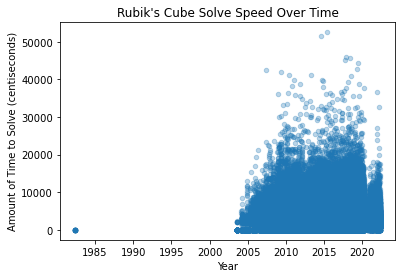

In [12]:
plot = points.plot.scatter('date', 'averageTime', alpha = 0.3)
plt.title("Rubik's Cube Solve Speed Over Time")
plot.set(ylabel="Amount of Time to Solve (centiseconds)", xlabel="Year")

# setting points back to none so that it can be garbage collected and 
# we dont waste memory space (for large data sets memory is important)
points = None

## Zero Time??
Taking a look at the above plot we can see that there are a lot of averages and solutions that take $0 \space centiseconds$ to solve. This does not make sense, so lets look back at the **README** files to figure out if there is any alternative meaning for a time value of $0$.

> **README Text**
>- The value `-1` means DNF (Did Not Finish).
>- The value `-2` means DNS (Did Not Start).
>- The value `0` means "no result". For example a result in a `best-of-3` round
  has a value of `0` for the `value4`, `value5`, and `average` fields.

The **README** tells us that the above times count for missing points in the dataset. 
<br>
One important observation from the **README** is that averages are set to $0$ when the competitor did not solve 5 Rubik's Cubes because the event did not involve 5 Rubik's Cubes. It then is misleading to plot and use `average` time because of the numerous competitors who did not compete in a 5 cube average event. Therefore we will drop the `averages` column because it no longer is of use.

In [13]:
results_frame.drop('average', axis = 1, inplace = True)

Now lets look at how many points in our dataset are missing. This will be done through a function.
<br>
The function `check_missing` takes a table and an encoding for missing values and returns the count and percentage of the table that is the missing values

In [14]:
def check_missing(frame, missing_values, cols_to_check):
    # counter to keep track of missing values in columns value1, value2, ...
    mis_vals = dict(missing_values)
    for key in mis_vals.keys():
        mis_vals[key] = 0

    for col in cols_to_check:
        for key,value in missing_values.items():
            counts = frame[col].value_counts()
            if value in counts:
                mis_vals[key] += counts[value]

    # getting totals missing data
    mis_vals['Total Missing'] = sum(mis_vals.values())
    
    # multipying length by lenth of number of columns
    num_values = len(frame) * len(cols_to_check)
    
    # getting percentages
    mis_val_percent = dict(mis_vals)
    for key, val in mis_val_percent.items():
        mis_val_percent[key] = 100 * mis_vals[key] / num_values
    
    # getting into table format
    rows = [None] * len(mis_vals.keys())
    
    for i in range(0, len(mis_vals.keys())):
        key = list(mis_vals.keys())[i]
        rows[i] = {'Number': mis_vals[key], 
                   'Percent of Total Data': mis_val_percent[key]}
        
    

    # making table of findings
    missing_counts = pd.DataFrame(rows, index = mis_vals.keys())

    display(missing_counts)

In [15]:
check_missing(results_frame, 
              missing_values = {'DNF' : -1, 'DNS': -2, 'No Result': 0}, 
              cols_to_check = ['value1', 'value2', 'value3', 'value4', 'value5'])

,Number,Percent of Total Data
DNF,87621,2.253418
DNS,2359,0.060668
No Result,16485,0.423958
Total Missing,106465,2.738044


There seems to be a lot of missing data. However because of the size of the data set, the missing data reprsents a small portion (only about 2.7 percent).

## Missing Data: What to do?
As described above, there are three types of missing values in the dataset. Before we can properly handle these missing values we must first determine what kind of missing data we are dealing with. 
<br>
There are three major types of missing data:
- Missing Completely at Random
- Missing At Random
- Missing Not at Random

#### Missing Completely at Random
This happens when the data is missing for purely random reasons and there is no way to systematically predict if a datapoint is missing. Overall this is ***VERY RARE*** and it did not occur in our data.

#### Missing At Random
In this case probabily a certain datapoint is missing is dependent on the information that we already have. For example in our dataset the "**no result**" data is something that is missing at random.
<br>
No result only occurs when the competition was not a best of 5 solves event. In the case that a competiton was best of 3 or best of 2, the competitors do not solve a cube for the 4<sup>th</sup> or 5<sup>th</sup> time. There is thus no value to then record in the `value4` and `value5` of the table. We can then model if a particular cell is going to be zero by the following:
```
if (from competition that is best of 3) {
    value4 is 0
    value5 is 0
    average is 0
}
if (from competition that is best of 2) {
    value3 is 0
}
```
The purpose of this analysis is to determine if there are competitions that are harder than others. We do not particularly care if a competition was a best of 5, 3, or 2. All we care about is the raw list of times that did take place for each competition. For this reason we can ignore the values of **no result**.

#### Missing Not At Random
This happens when the missing data is missing for a reason that has to do with the data itself. A simple example is when someone refuses to answer a question in a survey because they are embarassed by their potential answer. In our data the **DNF** and **DNS** are *missing not at random*. Before we can proceed we must first decide what to do with each of these values.
<br><br>
For DNSs:
<br>
From the above code we can see that they account for $0.06$ percent of the total data that we have. This is a tiny fraction so I believe that any changes made will cause any impact on our final result. For these reasons I believe that it is alright to ignore and drop these values. 
<br><br>
For DNFs:
<br>
These values represent the majority of the missing data in our dataset so it is not something that we can ignore. DNFs occur in many ways but the most common way is from an unfinished cube. By the [WCA regulations](https://www.worldcubeassociation.org/regulations/guidelines.html#article-10-solved-state) an unfinished cube requires 2 or more outer turns to reach a solved state, and attempts with such solutions receive a DNF.
<br>
We cannot simply ignore DNFs. If a competitor did not finish solving a puzzle then it may be an indication that the puzzle itself was harder to solve. Determining if certain competitioins (and by extention puzzles) are harder to solve is the entire point of this analysis so ignoring these values is detrimential. 
<br><br>
What Should the Value be?
<br>
In practice the vast majority of DNFs are from a failed `M slice`. An `M slice` is when you rotate the center slice of a Rubik's Cube. When failing an `M slice` the cube is 1 or 2 center turns from being solved. In both of these cases (1 turn or 2 turns) the attempt is considered a DNF because a single `M slice` requires 2 outer cube rotations to be completed. 
> `M slices` are common final moves as they are required at the end of many solution algorithms. 

In competition being 1 turn from fully solved recieves a pentaly of $+2$ seconds. To then properly account for a failed `M slice` I will use a pentaly of $+4$ seconds applied to the average of the other times of the competitor. A $+4$ penalty is given as it accounts for how a `M slice` is typically a more cumbersome and difficult move to complete when compared to the traditional face turn. Additionally it has a higher penality which fits the spirit of the WCA regulations that more highly penalize non-face turns.   

### `M slice` Picture
![Alt text](https://ruwix.com/pics/notation/rubiks-cube-notation-middle.png)

### First to deal with the DNF values
The function `impute`, will replace all the DNFs in `results_frame` with the averages of valid times from each row with a `+4` second penalty.
> Note:
> <br>
> If all the values of a competitor are missing (i.e. if all values are either "no result", DNF, or DNS) then the DNF values are remain at `-1`

In [16]:
def impute(frame):
    
    # to take an average while of values that don't correspond to missing values
    # we will set all missing values to NaN. This will be done in a separate frame
    # as to not lose the original data.
    is_na = frame.replace(-1, np.NaN).drop('competitionId', axis = 1)
    is_na = is_na.replace(0, np.NaN)
    is_na = is_na.replace(-2, np.NaN)
    
    # Now we are taking the mean of every row in the new frame we made
    # adding 400 centiseconds to the values of the averages (+4 seconds)
    is_na['averages'] = is_na.mean(axis = 1) + 400
    
    # converting everything back to ints (any rows where we could not get average is left as -1)
    is_na['averages'].fillna(-1, inplace = True)
    is_na['averages'] = is_na['averages'].astype(int)

    # now looping through all the value columns in the original dataframe and replacing any
    # DNFs with the average + penalty that we just computed above. 
    # the mask variable will remove any values from the pandas series that do not correspond
    # to a row with a -1 (DNF) value.
    cols_to_check = ['value1', 'value2', 'value3', 'value4', 'value5']
    for col in cols_to_check:
        mask = frame[col] == -1
        frame.loc[mask, col] = is_na.loc[mask, 'averages']

In [17]:
# imputing and looking at the amount of missing values left.
impute(results_frame)
check_missing(results_frame, 
              missing_values = {'DNF' : -1, 'DNS': -2, 'No Result': 0}, 
              cols_to_check = ['value1', 'value2', 'value3', 'value4', 'value5'])

,Number,Percent of Total Data
DNF,2113,0.054342
DNS,2359,0.060668
No Result,16485,0.423958
Total Missing,20957,0.538968


We went from having 87,000+ **DNF** data points to a little over 2,000 **DNF** points. This reduced the missing data proportion from $2.7\%$ to $0.54\%$.
<br>
Now recall that **No Result** datapoints can be completely ignored because they represent best of 3 and best of 2 events where there was no attempt number 4 or attempt number 5. These can be dropped without consequences. Of the remaining missing data, the combined totals of **DNF** and **DNS** now only make up around $0.11\%$ of the data. This is a much lower number and it may now be possible to drop these remaining points without much impact on our final results. 

#### Tidying Up Before Dealing With DNS
Our `results_frame` has a list of 5 values for each column. It would be more useful if we had a table with two columns, one for `competitionId` and one for a time that happened at the competition. The following will shift our results table to be something easier to work with.

In [18]:
results_frame.head()

,competitionId,value1,value2,value3,value4,value5
0,LyonOpen2007,1968,2203,2138,2139,2108
1,LyonOpen2007,2222,2153,1731,2334,2046
2,LyonOpen2007,3430,2581,2540,2789,2305
3,LyonOpen2007,2715,2452,2868,2632,2564
4,LyonOpen2007,2921,3184,2891,2677,2907


The following code will create a new table called `pivoted_results` which will pivot the `results_frame` such that there is only one time value for each row.

In [19]:
pivoted_results = (results_frame.set_index('competitionId').stack())
pivoted_results = pd.DataFrame(pivoted_results)
pivoted_results.rename(columns = {0: 'time'}, inplace = True)
pivoted_results.reset_index(inplace = True)
display(pivoted_results.head())

# we no longer need the results frame and it is a large 
# waste of memory so setting it to None will help it 
# become garbage collected.
results_frame = None

,competitionId,level_1,time
0,LyonOpen2007,value1,1968
1,LyonOpen2007,value2,2203
2,LyonOpen2007,value3,2138
3,LyonOpen2007,value4,2139
4,LyonOpen2007,value5,2108


Lets drop the `level_1` column because we no longer care about the information relating to which solve number a time is.

In [20]:
pivoted_results.drop('level_1', axis = 1, inplace = True)

### Dropping Remaining Missing Values
The new pivoted form makes it much easier to drop the missing values without dropping an entire row of data.

In [21]:
# dropping rows with missing values (the values are all 0 or less)
pivoted_results = pivoted_results[pivoted_results['time'] > 0]

# checking to see the number changes
check_missing(pivoted_results, 
              missing_values = {'DNF' : -1, 'DNS': -2, 'No Result': 0}, 
              cols_to_check = ['time'])

,Number,Percent of Total Data
DNF,0,0.0
DNS,0,0.0
No Result,0,0.0
Total Missing,0,0.0


### Plotting Part 2
Now that we have dealt with the missing values lets plot again to see if there are any patterns. This is mostly just a rehash of previous creating points code (changed `results_frame` to `pivoted` and `averageTime` to `time`)

In [22]:
points = pd.DataFrame()
points['date'] = pivoted_results['competitionId'].map(
    competitions_frame.set_index('id')['startDate'])

points['year'] = pivoted_results['competitionId'].map(
    competitions_frame.set_index('id')['year'])

points['time'] = pivoted_results['time']
display(points.head())

,date,year,time
0,2007-09-01,2007,1968
1,2007-09-01,2007,2203
2,2007-09-01,2007,2138
3,2007-09-01,2007,2139
4,2007-09-01,2007,2108


In [23]:
# function to plot
def plot_scatter(points, log_y, title):
    plot = points.plot.scatter('year', 'time', alpha = 0.2, logy = log_y)
    plt.title(title)
    plot.set(ylabel="Amount of Time to Solve (centiseconds)", xlabel="Year")

> **Warning**
> <br>
> Takes some time to plot

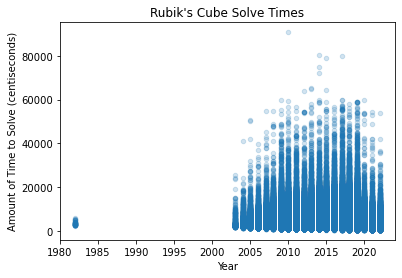

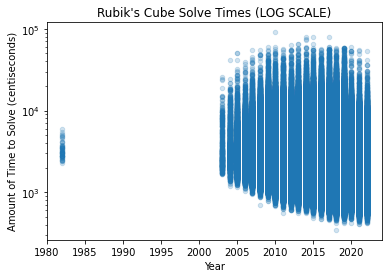

In [24]:
# plotting the scatter plot
plot_scatter(points, False, "Rubik's Cube Solve Times")

# plotting with a LOG SCALE because large variability in times
plot_scatter(points, True, "Rubik's Cube Solve Times (LOG SCALE)")

#### Better Plots
The scatter plot was not really informative. Instead lets create a *violin plot* this is a plot that will allow us to look at the distribution of the data across every year.

In [25]:
# a function that will make the violin plot
# the input x need to be an integer (year)
# the input y is a list of all the values for that year
def vio_plot(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    ax.violinplot(y, x, widths = 4, showmeans = True)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # setting the y axis to log because of large variablilty
    ax.set_yscale('log')

In [26]:
# setting up the data so we can use the violin plot
group_by_year = points.groupby('year').agg({'time':list})
yearly_times = group_by_year['time'].tolist()
years = points['year'].unique().tolist()

# setting group by year to None so it can be garbage 
# collected and not waste memory (will no longer need it)
group_by_year = None

> **Warning**
> <br>
> The following code takes a moment to run.

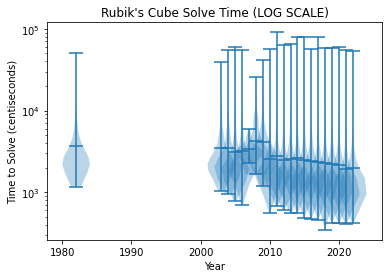

In [27]:
#plotting
vio_plot(years, yearly_times,
         "Year", "Time to Solve (centiseconds)", "Rubik's Cube Solve Time (LOG SCALE)")

From the plots we can see that the the distribution is highly clumped around low times. There are a number of outliers for extremely high times (seen by the $10^{5}$ times) but the averages remain really low.

## Miscellaneous Exploration
Before we begin any statistical analysis it may be usefull to know how many unique competitons we have, how many solve times are in each year, how many competitons a year and other summarizing statistics.
### Getting Number of Competitons per Year

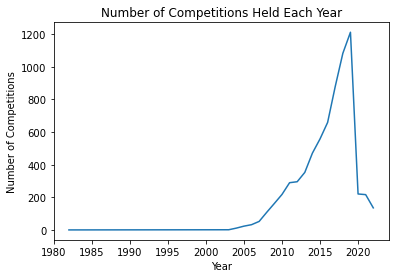

In [28]:
# adding year data to the pivoted results from the points data
pivoted_results['year'] = points['year']

# creating a temporary var to hold the count of number of competitions in each year
temp_series = pivoted_results.drop('time', axis = 1).groupby('year')['competitionId'].nunique()

# turning the temporary var into a pretty line_plot
plot = pd.DataFrame(temp_series).plot.line(legend = False)
plot.set(ylabel = "Number of Competitions", xlabel = "Year", title = "Number of Competitions Held Each Year");

> **Note**
> <br>
> There is no data about competitons from 1983 to 2003. The long straight line may be a little misleading.

#### Observations
Up until 2008 there was a low number of competitons held each year then there was a large increase in the number of competitions. Then there was a major drop in competitons starting from 2020 which is most likely due to the pandemic. 

### Getting Total Number of Competitions Held

In [29]:
print(sum(temp_series))

# no longer need the temp_series
temp_series = None

6988


### Getting Total Number of Unique Non Repeated Competitions
Note: Some of these competitons were cancelled (this information is in the competitions frame)

In [30]:
print(competitions_frame.name.nunique())

5205


#### Observations
Because there were around 7,000 competitions held and only around 5,200 unique competitions listed, at least 2,000 of the competitions in our results come frome competitions that have been repeated (either held anually or repeated once, etc.)

### Getting Total Number of Solves per Year

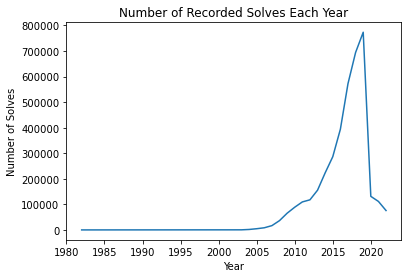

In [31]:
# First grouping the pivoted results by the year. 
# Second aggregating the groups by getting a count of the number
# of times in each year
#
# Third making it a line plot
plot = pivoted_results.groupby('year').agg({'time':'count'}).plot.line(legend = False)
plot.set(xlabel = "Year", ylabel = "Number of Solves", title = "Number of Recorded Solves Each Year");

> **Note**
> <br>
> There is no data about competitons from 1983 to 2003. The long straight line may be a little misleading.

#### Observations
Up until 2006 there was a really low number of solves per year (looks like 1000 or less) and then from there it starts to pick up. This reduced sample size for 2006 and prior may limit our statistical analysis to years after 2006.

## Statistics!!
#### Idea
In order to determine if a competition is significantly harder than others I will define "hardness" by the time it takes to solve the Rubik's Cube. An easy competition will then have low times for each of the solves and a hard competition will have high times for the solves. 
<br>
To then compare competitions, we will look at the set of times for a competition and compare it to the rest entire set of times corresponding to the year of the competition. This will be through a `p-test`.
> **Note:**
> <br>
> We can use a `p-test` and not a `student's t-test` because we have the **entire population data**.
> <br>
> We are treating the set of all competitons as the population.

**Pros of Method**
<br>
It may account for how the distribution of times is slowly decreasing each year. Treating the the year as the population will keep the years independent from one another and this will hopely account for this annual decrease.
<br>
**Cons of Method**
<br>
One problem with this method is that we will have to drop any analysis on any data up until at least 2006. Prior to 2006 there were so few competitions held that any subset of times from a competition would make up such a large portion of the annual population that any analysis would be meaningless.


### Hypothesis
#### Null Hyptothesis
$H_0 : \text{average_per_competition } = \text{ anual_average}$
#### Alternative Hyptothesis
$H_a : \text{average_per_competition } > \text{ anual_average}$

#### Prediction
I will be *very* surprised if we find out that there is enough evidence to reject the null hypothesis.

### Acceptable P-value: 0.05
What is a p-value?
<br>
A *p-value* is the probability that given null hypothesis is true, we will see something as extreme or more extreme than our data. 
<br>
Chosing exactly which value (or percent) to use is ultimately arbitrary. A value of 0.05 is very commonly used so it seems like a good benchmark. 

#### Type of `p-test`

Reference [Stat 500 Penn State University](https://online.stat.psu.edu/stat500/book/export/html/576)


We will be using a **one sided p-test**. We want to know the probability that the sample is *higher* than expected. 

### Sorting competitions by z score

## Discussion

## What did we learn?
#### Data Science is 90% getting and cleaning data
We spent a lot of time just understanding the database, getting our tables, removing unnecessary data, pivoting our tables, etc. A majority of Data Science is just making the large amounts of data easier to work with. Once we do that applying the tools is a piece of cake.
#### How to deal with missing values
When we originally got our data there was a lot of missing data. A lot of the data was stuff we should not and could not ignore. We figured out how to substitute those missing values and improve our analysis. 

## Post Discussion Thoughts
The original goal of this tutorial was to look for relationships between a given scramble and a time. This was to eventually determine if some scrambles are more difficult than others. The WCA records the scrambles used in competiton so this seemed like a reasonable task to accomplish. 
<br><br>
However it became impossible. Competitons reported scrambles by a round and group identification but results are reported by round only. There became no way to map a particular time to a scramble. 
<br><br>
It is unfortunate that there is such a simple yet vital piece of data missing. I encourage the WCA and all competitions to start reporting which individuals belong to which groups so that future analysis of this sort is possible.